# Retour

In [304]:
import pyodbc

In [305]:
DB = {'servername' : 'MSI\\SQLEXPRESS',
      'database' : 'GreatOutdoorsDatawareHouse1'}
export_conn = pyodbc.connect('DRIVER={SQL server};SERVER=' + DB['servername'] + ';DATABASE=' + DB['database'] + ';Trusted_Connection=yes')
   

order = pd.read_sql_query("SELECT * FROM order_table", export_conn)
product = pd.read_sql_query("SELECT * FROM product_table", export_conn)
retour = pd.read_sql_query("SELECT * FROM returned_item_table", export_conn)
retour

C:\Users\thomv\AppData\Local\Temp\ipykernel_17120\393488501.py:6: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  order = pd.read_sql_query("SELECT * FROM order_table", export_conn)
C:\Users\thomv\AppData\Local\Temp\ipykernel_17120\393488501.py:7: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  product = pd.read_sql_query("SELECT * FROM product_table", export_conn)
C:\Users\thomv\AppData\Local\Temp\ipykernel_17120\393488501.py:8: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  retour = pd.read_sql_query("SELECT * FROM returned_it

,S_KEY,return_code,return_quantity,order_number,order_S_KEY,order_detail_code,return_reason_code,return_reason_S_KEY,return_date
0,1,1491,8,7446,21661,84858,5,5,2021-08-01
1,2,1492,2,7316,20147,84440,2,2,2020-12-06
2,3,1493,22,7359,20474,84867,4,4,2021-06-24
3,4,1494,20,7448,21696,84873,3,3,2021-07-21
4,5,1496,2,7438,21594,84488,1,1,2020-10-07
...,...,...,...,...,...,...,...,...,...
701,702,2465,24,7625,23796,114972,3,3,2021-06-06
702,703,2466,66,7622,23666,114983,5,5,2021-10-06
703,704,2467,64,7630,24017,115215,4,4,2022-03-31
704,705,2468,2,7629,23964,115171,1,1,2022-12-23


## perpareren

In [306]:
retour = retour.drop([ "S_KEY","return_date", "return_code", "order_number", "order_detail_code", "return_reason_code"], axis=1)

retour

,return_quantity,order_S_KEY,return_reason_S_KEY
0,8,21661,5
1,2,20147,2
2,22,20474,4
3,20,21696,3
4,2,21594,1
...,...,...,...
701,24,23796,3
702,66,23666,5
703,64,24017,4
704,2,23964,1


In [307]:
order = order.drop(["order_date", "sales_branch_S_KEY", "sales_staff_S_KEY", "order_method_S_KEY", "retailer_site_S_KEY", "product_number", "order_number", "order_detail_Code", "retailer_name"], axis=1)
order['retailer_site_code'] = order['retailer_site_code'].astype('category')
order_encoded1 = pd.get_dummies(order, columns=['retailer_site_code'], prefix='retailer_site_code')
order['sales_staff_code'] = order['sales_staff_code'].astype('category')
order_encoded2 = pd.get_dummies(order, columns=['sales_staff_code'], prefix='sales_staff_code')
order['sales_branch_Code'] = order['sales_branch_Code'].astype('category')
order_encoded3 = pd.get_dummies(order, columns=['sales_branch_Code'], prefix='sales_branch_Code')
order['order_method_code'] = order['order_method_code'].astype('category')
order_encoded4 = pd.get_dummies(order, columns=['order_method_code'], prefix='order_method_code')
order_encoded1 = order_encoded1.drop(["S_KEY", "product_S_KEY"], axis=1)
order_encoded2 = order_encoded2.drop(["S_KEY", "product_S_KEY"], axis=1)
order_encoded3 = order_encoded3.drop(["S_KEY", "product_S_KEY"], axis=1)
order_encoded4 = order_encoded4.drop(["S_KEY", "product_S_KEY"], axis=1)
order = pd.concat([order_encoded1, order_encoded2, order_encoded3, order_encoded4, order], axis=1) 
order =  order.drop(["retailer_site_code", "sales_staff_code", "sales_branch_Code", "order_method_code"], axis=1)
order

,quantity,unit_cost,unit_price,unit_sale,retailer_site_code_1,retailer_site_code_2,retailer_site_code_3,retailer_site_code_4,retailer_site_code_5,retailer_site_code_6,...,order_method_code_4,order_method_code_5,order_method_code_7,order_method_code_8,S_KEY,product_S_KEY,quantity,unit_cost,unit_price,unit_sale
0,100,10.0,13.0,12.0,False,False,False,True,False,False,...,False,False,True,False,1,28,100,10.0,13.0,12.0
1,254,18.0,27.0,25.0,False,False,False,True,False,False,...,False,False,True,False,2,42,254,18.0,27.0,25.0
2,114,20.0,27.0,25.0,False,False,False,True,False,False,...,False,False,True,False,3,45,114,20.0,27.0,25.0
3,130,21.0,35.0,31.0,False,False,False,True,False,False,...,False,False,True,False,4,46,130,21.0,35.0,31.0
4,74,42.0,68.0,61.0,False,False,False,True,False,False,...,False,False,True,False,5,49,74,42.0,68.0,61.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43058,64,19.0,38.0,33.0,False,False,False,False,False,False,...,False,True,False,False,43059,64,64,19.0,38.0,33.0
43059,24,9.0,18.0,16.0,False,False,False,False,False,False,...,False,True,False,False,43060,68,24,9.0,18.0,16.0
43060,40,40.0,80.0,70.0,False,False,False,False,False,False,...,False,True,False,False,43061,69,40,40.0,80.0,70.0
43061,32,79.0,99.0,94.0,False,False,False,False,False,False,...,False,True,False,False,43062,92,32,79.0,99.0,94.0


In [308]:
product = product.drop(["introduction_date", "product_name", "description", "product_number"], axis=1)
product['product_type'] = product['product_type'].astype('category')
product_encoded1 = pd.get_dummies(product, columns=['product_type'], prefix='product_type')
product['product_line'] = product['product_line'].astype('category')
product_encoded2 = pd.get_dummies(product, columns=['product_line'], prefix='product_line')
product['margin_group'] = product['margin_group'].astype('category')
product_encoded3 = pd.get_dummies(product, columns=['margin_group'], prefix='margin_group')
product_encoded1 = product_encoded1.drop(["S_KEY"], axis=1)
product_encoded2 = product_encoded2.drop(["S_KEY"], axis=1)
product_encoded3 = product_encoded3.drop(["S_KEY"], axis=1)
product = pd.concat([product_encoded1, product_encoded2, product_encoded3, product], axis=1) 
product =  product.drop(["product_line", "product_type", "margin_group"], axis=1)
product

,introduction_year,introduction_quater,introduction_month,margin,product_type_Binoculars,product_type_Climbing Accessories,product_type_Cooking Gear,product_type_Eyewear,product_type_First Aid,product_type_Golf Accessories,...,margin,margin_group_0 t/m 20%,margin_group_20 t/m 40%,margin_group_40 t/m 60%,margin_group_60 t/m 80%,S_KEY,introduction_year,introduction_quater,introduction_month,margin
0,2011,1,2,33,False,False,True,False,False,False,...,33,False,True,False,False,1,2011,1,2,33
1,2011,1,2,4,False,False,True,False,False,False,...,4,True,False,False,False,2,2011,1,2,4
2,2011,1,2,5,False,False,False,False,True,False,...,5,True,False,False,False,3,2011,1,2,5
3,2019,4,12,43,False,False,False,False,False,False,...,43,False,False,True,False,4,2019,4,12,43
4,2019,4,12,51,False,False,False,False,False,False,...,51,False,False,True,False,5,2019,4,12,51
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110,2011,1,2,5,False,False,False,False,False,False,...,5,True,False,False,False,111,2011,1,2,5
111,2011,1,2,28,False,False,False,False,True,False,...,28,False,True,False,False,112,2011,1,2,28
112,2013,1,3,28,False,False,False,False,True,False,...,28,False,True,False,False,113,2013,1,3,28
113,2011,1,2,5,False,False,False,False,True,False,...,5,True,False,False,False,114,2011,1,2,5


In [309]:
data = pd.merge(retour, order, left_on="order_S_KEY" , how="inner", right_on="S_KEY")
data = pd.merge(data, product, left_on="product_S_KEY", how="inner", right_on="S_KEY")
data = data.drop(["order_S_KEY", "S_KEY_x", "S_KEY_y", "product_S_KEY"], axis=1)
data

,return_quantity,return_reason_S_KEY,quantity,unit_cost,unit_price,unit_sale,retailer_site_code_1,retailer_site_code_2,retailer_site_code_3,retailer_site_code_4,...,introduction_month,margin,margin_group_0 t/m 20%,margin_group_20 t/m 40%,margin_group_40 t/m 60%,margin_group_60 t/m 80%,introduction_year,introduction_quater,introduction_month,margin
0,8,5,2,551.0,993.0,993.0,False,False,False,False,...,12,43,False,False,True,False,2019,4,12,43
1,2,2,52,2.0,6.0,6.0,False,False,False,False,...,2,67,False,False,False,True,2011,1,2,67
2,22,4,32,35.0,63.0,63.0,False,False,False,False,...,12,43,False,False,True,False,2019,4,12,43
3,20,3,80,2.0,7.0,6.0,False,False,False,False,...,2,7,True,False,False,False,2011,1,2,7
4,2,1,36,3.0,6.0,6.0,False,False,False,False,...,2,5,True,False,False,False,2011,1,2,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
701,24,3,50,6.0,12.0,9.0,False,False,False,False,...,1,5,True,False,False,False,2020,1,1,5
702,66,5,80,5.0,10.0,8.0,False,False,False,False,...,12,5,True,False,False,False,2019,4,12,5
703,64,4,8,80.0,200.0,140.0,False,False,False,False,...,12,6,True,False,False,False,2019,4,12,6
704,2,1,4,82.0,180.0,131.0,False,False,False,False,...,12,55,False,False,True,False,2019,4,12,55


In [310]:
x = data.drop(["return_reason_S_KEY"], axis=1)
data['margin_group'] = data['return_reason_S_KEY'].astype('category')
dummie = pd.get_dummies(data, columns=['return_reason_S_KEY'], prefix='return_reason_S_KEY')
data = pd.concat([data, dummie], axis=1)
y = data.loc[:, ["return_reason_S_KEY"]]
y

,return_reason_S_KEY
0,5
1,2
2,4
3,3
4,1
...,...
701,3
702,5
703,4
704,1


In [311]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.15, random_state=42)

In [312]:
dtree = DecisionTreeClassifier(max_depth=4)
dtree = dtree.fit(x_train, y_train)
dtree

DecisionTreeClassifier(max_depth=4)

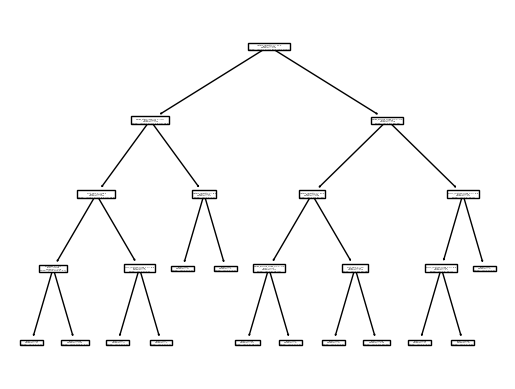

In [313]:
tree.plot_tree(dtree, feature_names=x.columns)
plt.show()

In [314]:
y_pred = dtree.predict(x_test)
y_pred

array([1, 1, 1, 5, 1, 1, 1, 5, 5, 5, 1, 5, 1, 1, 5, 1, 1, 5, 1, 1, 1, 5,
       1, 5, 1, 1, 1, 1, 5, 1, 5, 1, 5, 1, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5,
       5, 5, 1, 1, 5, 5, 1, 1, 1, 5, 1, 1, 1, 5, 5, 1, 1, 1, 1, 1, 5, 5,
       1, 1, 1, 5, 1, 1, 5, 1, 5, 1, 1, 1, 5, 1, 1, 1, 1, 5, 5, 1, 1, 5,
       1, 5, 5, 5, 5, 5, 1, 5, 1, 5, 1, 1, 5, 1, 1, 1, 1, 5], dtype=int64)

In [315]:
prediction_df = pd.DataFrame(y_pred)
prediction_df = prediction_df.rename(columns={0: "Predicted_return_reason"})
y_pred_merge = pd.concat([y_test.reset_index()["return_reason_S_KEY"], prediction_df], axis=1)
result = y_pred_merge.loc[y_pred_merge["Predicted_return_reason"].notna(), :]
result

,return_reason_S_KEY,Predicted_return_reason
0,2,1
1,1,1
2,1,1
3,4,5
4,5,1
...,...,...
101,1,1
102,2,1
103,1,1
104,1,1


In [316]:
prediction_df = pd.DataFrame(y_pred)
prediction_df = prediction_df.rename(columns={0: "Predicted_return_reason"})
y_pred_merge = pd.concat([y_test.reset_index()["return_reason_S_KEY"], prediction_df], axis=1)
result = y_pred_merge.loc[y_pred_merge["Predicted_return_reason"].notna(), :]
result

,return_reason_S_KEY,Predicted_return_reason
0,2,1
1,1,1
2,1,1
3,4,5
4,5,1
...,...,...
101,1,1
102,2,1
103,1,1
104,1,1


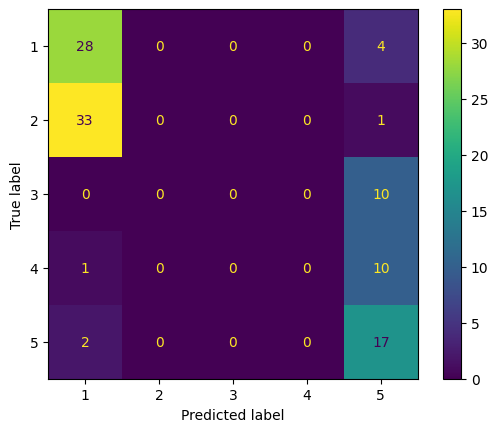

In [317]:
confusion_matrix = metrics.confusion_matrix(result["return_reason_S_KEY"], result["Predicted_return_reason"])
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix, display_labels=[1, 2, 3, 4, 5])

cm_display.plot()
plt.show()

In [318]:
accuracy_score(result["return_reason_S_KEY"], result["Predicted_return_reason"])

0.42452830188679247

In [319]:
precision_score(result["return_reason_S_KEY"], result["Predicted_return_reason"], average='weighted')

c:\Users\thomv\AppData\Local\pypoetry\Cache\virtualenvs\deds-BPqXE-Fa-py3.12\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


0.20462713387241688

In [320]:
dtree = DecisionTreeClassifier()
dtree = dtree.fit(x_train, y_train)
dtree

DecisionTreeClassifier()

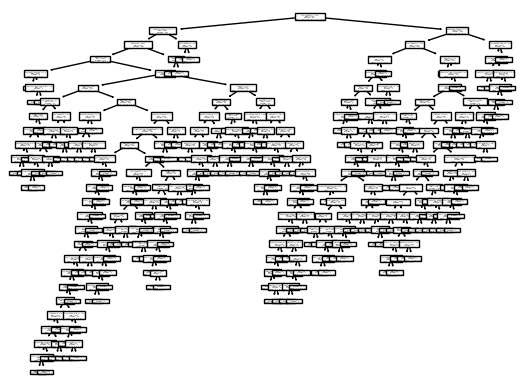

In [321]:
tree.plot_tree(dtree, feature_names=x.columns)
plt.show()

In [322]:
y_pred = dtree.predict(x_test)
y_pred

array([1, 2, 2, 5, 2, 1, 1, 5, 3, 5, 1, 4, 2, 1, 5, 1, 1, 4, 2, 2, 2, 3,
       1, 3, 1, 1, 2, 2, 3, 2, 5, 2, 4, 2, 1, 4, 2, 5, 1, 4, 1, 5, 1, 5,
       4, 3, 2, 2, 5, 5, 2, 2, 1, 5, 2, 2, 1, 4, 4, 1, 1, 1, 1, 1, 1, 2,
       1, 1, 2, 3, 2, 2, 5, 1, 4, 2, 1, 2, 3, 2, 2, 1, 2, 3, 4, 2, 1, 1,
       1, 5, 1, 5, 4, 5, 2, 3, 2, 5, 2, 1, 3, 2, 1, 1, 1, 5], dtype=int64)

In [323]:
prediction_df = pd.DataFrame(y_pred)
prediction_df = prediction_df.rename(columns={0: "Predicted_return_reason"})
y_pred_merge = pd.concat([y_test.reset_index()["return_reason_S_KEY"], prediction_df], axis=1)
result = y_pred_merge.loc[y_pred_merge["Predicted_return_reason"].notna(), :]
result

,return_reason_S_KEY,Predicted_return_reason
0,2,1
1,1,2
2,1,2
3,4,5
4,5,2
...,...,...
101,1,2
102,2,1
103,1,1
104,1,1


In [324]:
confusion_matrix = metrics.confusion_matrix(result["return_reason_S_KEY"], result["Predicted_return_reason"])
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix, display_labels=[1, 2, 3, 4, 5])

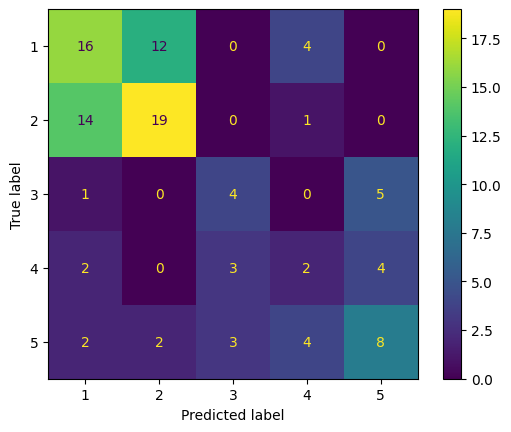

In [325]:
cm_display.plot()
plt.show()

In [326]:
accuracy_score(result["return_reason_S_KEY"], result["Predicted_return_reason"])

0.46226415094339623

In [327]:
precision_score(result["return_reason_S_KEY"], result["Predicted_return_reason"], average='weighted')

0.4636368441029929

In [339]:
dtree = DecisionTreeClassifier(max_depth=15)
dtree = dtree.fit(x_train, y_train)
dtree

DecisionTreeClassifier(max_depth=15)

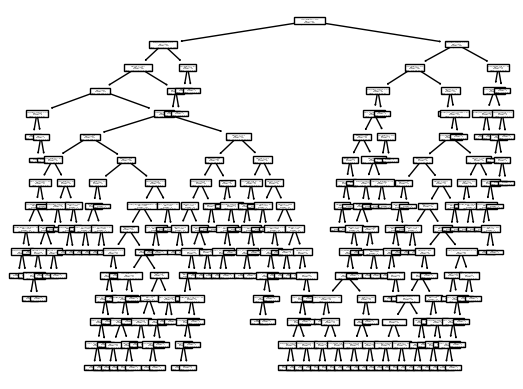

In [340]:
tree.plot_tree(dtree, feature_names=x.columns)
plt.show()

In [341]:
y_pred = dtree.predict(x_test)
y_pred

array([1, 2, 2, 5, 2, 1, 1, 5, 3, 5, 1, 4, 2, 1, 5, 1, 1, 4, 2, 2, 2, 3,
       1, 3, 1, 1, 1, 2, 3, 2, 5, 2, 4, 2, 2, 4, 2, 5, 2, 4, 2, 5, 1, 5,
       4, 3, 2, 2, 5, 5, 2, 2, 1, 5, 2, 2, 1, 4, 4, 1, 1, 1, 1, 1, 1, 2,
       4, 1, 2, 3, 2, 2, 5, 1, 4, 2, 1, 2, 3, 2, 2, 1, 2, 3, 4, 2, 1, 5,
       2, 5, 1, 5, 5, 5, 2, 3, 2, 5, 2, 1, 3, 2, 2, 1, 1, 5], dtype=int64)

In [342]:
prediction_df = pd.DataFrame(y_pred)
prediction_df = prediction_df.rename(columns={0: "Predicted_return_reason"})
y_pred_merge = pd.concat([y_test.reset_index()["return_reason_S_KEY"], prediction_df], axis=1)
result = y_pred_merge.loc[y_pred_merge["Predicted_return_reason"].notna(), :]
result

,return_reason_S_KEY,Predicted_return_reason
0,2,1
1,1,2
2,1,2
3,4,5
4,5,2
...,...,...
101,1,2
102,2,2
103,1,1
104,1,1


In [343]:
confusion_matrix = metrics.confusion_matrix(result["return_reason_S_KEY"], result["Predicted_return_reason"])
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix, display_labels=[1, 2, 3, 4, 5])

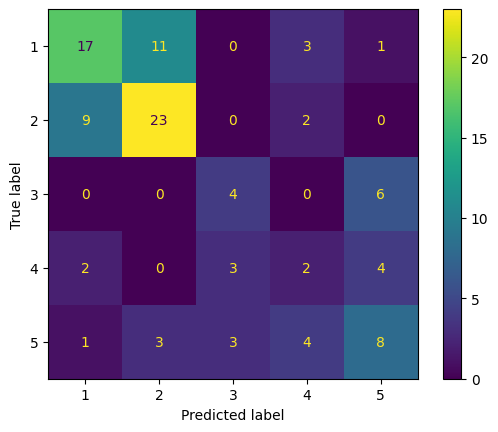

In [344]:
cm_display.plot()
plt.show()

In [345]:
accuracy_score(result["return_reason_S_KEY"], result["Predicted_return_reason"])

0.5094339622641509

In [346]:
precision_score(result["return_reason_S_KEY"], result["Predicted_return_reason"], average='weighted')

0.5084316587244369